# Lab Group 1: Lab 1 Presentation January 28, 2021
### Jennifer Evans(5.1), Madeline Sandfrey(5.2), Melanie Russo(5.2), Olivia Salaben(5.3)

In [1]:
import numpy as np
import pandas as pd

import ugradio
import ugradio.pico as pico
import ugradio.dft as dft

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider, Layout

## 5.1: Sample signal
parameters:
    - Voltage Range: 1V
    - N = 1
    - Dual = True
    - Nblocks = 3

In [2]:
imported_data = np.load("data.npz")

In [3]:
sig_a_data = imported_data["arr_0"][0,0, :200]
sig_a_data[:10]

array([ -9216,  11008, -12544,  14080, -15104,  16128, -16640,  17152,
       -17152,  17152], dtype=int16)

In [4]:
sig_b_data = imported_data["arr_0"][1,0,:200]
sig_b_data[:10]

array([ 16640,   3584, -10496, -19200, -19200, -10240,   4096,  16896,
        21248,  14848], dtype=int16)

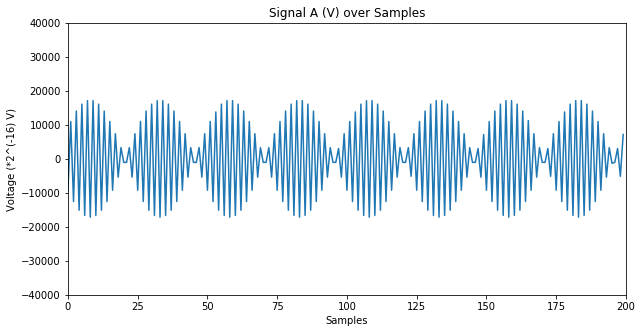

In [5]:
# signal A over samples
plt.figure(figsize=(10,5))
plt.xlim(0, 200)
plt.ylim(-40000,40000)
plt.xlabel("Samples")
plt.ylabel("Voltage (*2^(-16) V)")
plt.title("Signal A (V) over Samples")
plt.plot(sig_a_data)

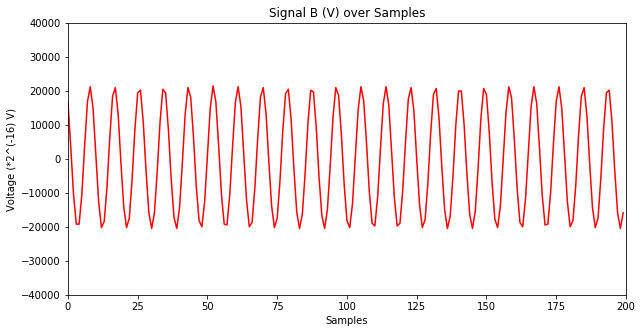

In [6]:
# signal B over samples
plt.figure(figsize=(10,5))
plt.xlim(0, 200)
plt.ylim(-40000,40000)
plt.xlabel("Samples")
plt.ylabel("Voltage (*2^(-16) V)")
plt.title("Signal B (V) over Samples")
plt.plot(sig_b_data,  'r',)

In [7]:
max(sig_a_data)

17152

In [8]:
max(sig_b_data)

21504

## 5.1 : Create time array from sampling frequency 62.5 MHz/N (Jen)

In [9]:
data_length = len(sig_a_data)
N = 1
sampling_frequency_MHz = 62500000/N
delta_t = 1/sampling_frequency_MHz
total_time = delta_t * data_length  

In [10]:
times = np.arange(0, total_time, delta_t)
times[:10]

array([0.00e+00, 1.60e-08, 3.20e-08, 4.80e-08, 6.40e-08, 8.00e-08,
       9.60e-08, 1.12e-07, 1.28e-07, 1.44e-07])

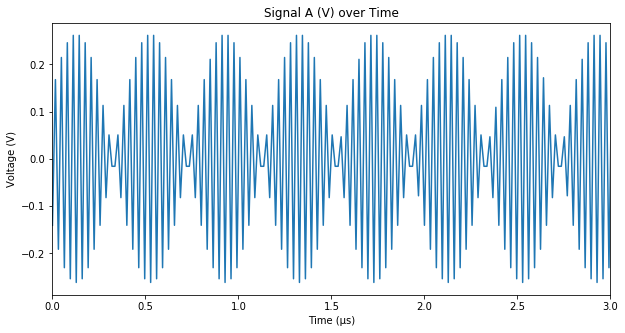

In [11]:
# signal A over time
plt.figure(figsize=(10,5))
#plt.xlim(0, total_time)
plt.xlim(0, 3)
#plt.ylim(-20000,20000)
plt.xlabel("Time (μs)")
plt.ylabel("Voltage (V)")
plt.title("Signal A (V) over Time")
plt.plot(times*(10**6), sig_a_data/(2**16))

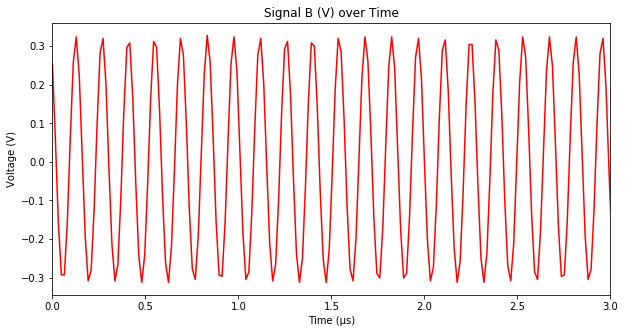

In [12]:
# signal B over time
plt.figure(figsize=(10,5))
#plt.xlim(0, total_time)
plt.xlim(0, 3)
#plt.ylim(-25000,25000)
plt.xlabel("Time (μs)")
plt.ylabel("Voltage (V)")
plt.title("Signal B (V) over Time")
plt.plot(times*(10**6), sig_b_data/(2**16),  'r',)

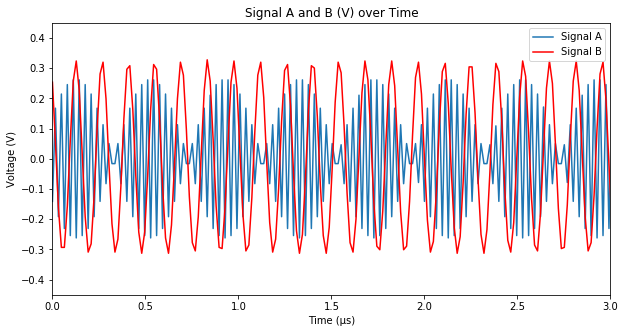

In [13]:
plt.figure(figsize=(10,5))
#plt.xlim(0, total_time)
plt.xlim(0, 3)
plt.ylim(-0.45,0.45)
plt.xlabel("Time (μs)")
plt.ylabel("Voltage (V)")
plt.title("Signal A and B (V) over Time")

plt.plot(times*(10**6), sig_a_data/(2**16), label='Signal A')
plt.plot(times*(10**6), sig_b_data/(2**16), 'r', label='Signal B')
plt.legend(loc='upper right')

## 5.2 : Derive and Plot Fourier Transform (Madeline)

In [14]:
# dft.dft
ft_time = dft.dft(sig_a_data, vsamp=62500000)[0]
dft_sig_a = dft.dft(sig_a_data, vsamp=62500000)[1]
dft_sig_b = dft.dft(sig_b_data, vsamp=62500000)[1]
ft_time1= ft_time/10**6 #unit conversion to MHz
# numpy.fft.fft
fft_sig_a = np.fft.fft(sig_a_data)
fft_sig_a = np.fft.fftshift(fft_sig_a)
fft_sig_b = np.fft.fft(sig_b_data)
fft_sig_b = np.fft.fftshift(fft_sig_b)

Text(0.5, 1.0, 'Signal A Discrete and Fast Fourier Transform')

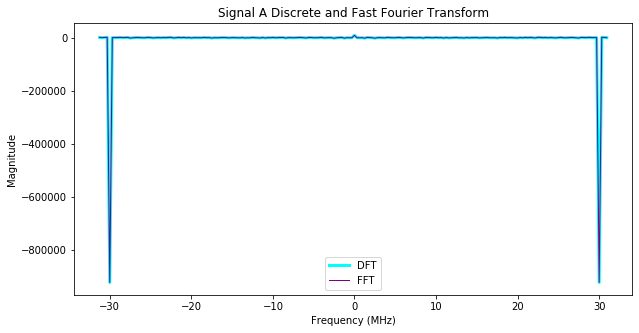

In [45]:
# dft and fft plots for Signal A
plt.figure(figsize=(10,5))
plt.plot(ft_time1, dft_sig_a, 'cyan', linewidth=3.0)
plt.plot(ft_time1, fft_sig_a, 'purple', linewidth=1)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.legend(["DFT", "FFT"])
plt.title("Signal A Discrete and Fast Fourier Transform")

Text(0.5, 1.0, 'Signal B Discrete and Fast Fourier Transform')

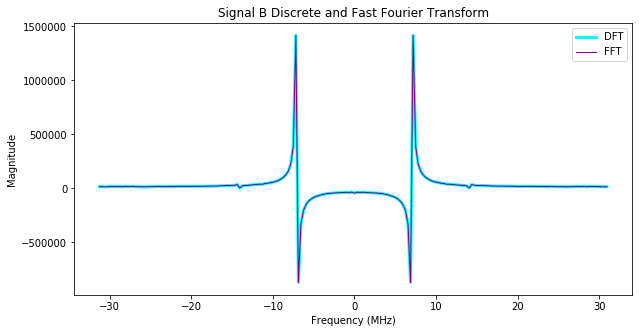

In [46]:
# dft and fft plots for Signal B
plt.figure(figsize=(10,5))
plt.plot(ft_time1, dft_sig_b, 'cyan', linewidth=3.0)
plt.plot(ft_time1, fft_sig_b, 'purple', linewidth=1)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.legend(["DFT", "FFT"])
plt.title("Signal B Discrete and Fast Fourier Transform")

## 5.2: Derive and Plot Fourier Power Spectra (Mel)

In [17]:
power_ft_sig_a = [abs(s)**2 for s in fft_sig_a]
power_ft_sig_b = [abs(s)**2 for s in fft_sig_b]

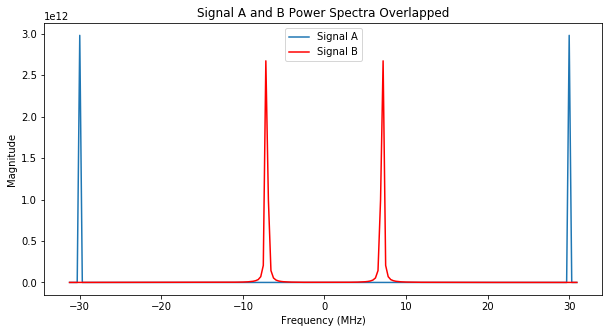

In [18]:
# dft power spectra comparison for signals a and b
plt.figure(figsize=(10,5))
plt.plot(ft_time1, power_ft_sig_a)
plt.plot(ft_time1, power_ft_sig_b, 'r')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("Signal A and B Power Spectra Overlapped")
plt.legend(["Signal A", "Signal B"])
#plt.xlim(0, 200)
#plt.ylim(-25000,25000)

## 5.2: Find Signal A Frequencies 

In [19]:
i = power_ft_sig_a.index(max(power_ft_sig_a))
sig_a_dft_frequency = abs(ft_time[i])
print("Signal A frequency: " + str(sig_a_dft_frequency/(10**6)) + " MHz")

Signal A frequency: 30.0 MHz


## 5.2: Find Signal B Frequencies 

In [20]:
i = power_ft_sig_b.index(max(power_ft_sig_b))
sig_b_dft_frequency = abs(ft_time[i])
print("Signal B frequency: " + str(sig_b_dft_frequency/(10**6)) + " MHz")

Signal B frequency: 7.1875 MHz


## 5.2: Compare Signal A and Signal B Time and Frequency Domain Plots

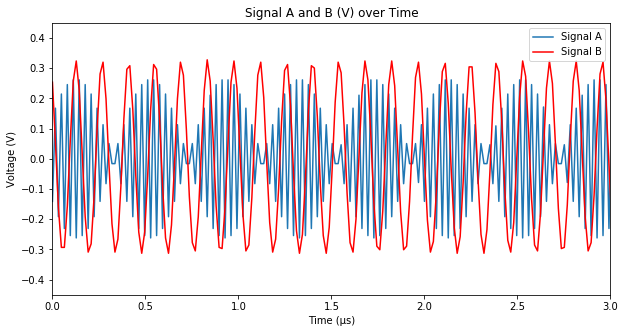

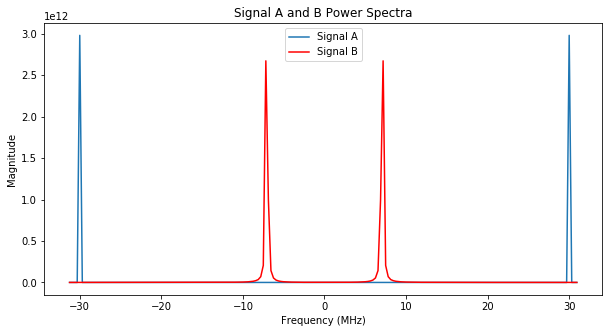

In [21]:
plt.figure(figsize=(10,5))
#plt.xlim(0, total_time)
plt.xlim(0, 3)
plt.ylim(-0.45,0.45)
plt.xlabel("Time (μs)")
plt.ylabel("Voltage (V)")
plt.title("Signal A and B (V) over Time")
plt.plot(times*(10**6), sig_a_data/(2**16))
plt.plot(times*(10**6), sig_b_data/(2**16), 'r')
plt.legend(["Signal A", "Signal B"], loc='upper right')

plt.figure(figsize=(10,5))
#plt.xlim(-50,50)
plt.plot(ft_time1, power_ft_sig_a)
plt.plot(ft_time1, power_ft_sig_b, 'r')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("Signal A and B Power Spectra")
plt.legend(["Signal A", "Signal B"])
#plt.xlim(0, 200)
#plt.ylim(-25000,25000)

In [22]:
#power spectrum comparison for DFT vs FFT (Madeline)
#narrow to wide time to frequency comparison (Mel), and explain how to find frequency
#different FT for different data captures (Olivia)
#creating time array (Jen)

## 5.3 (Olivia)

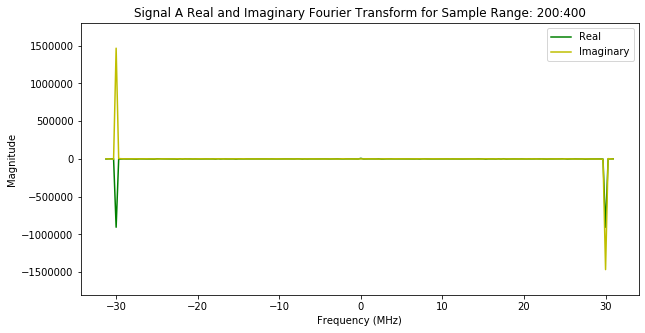

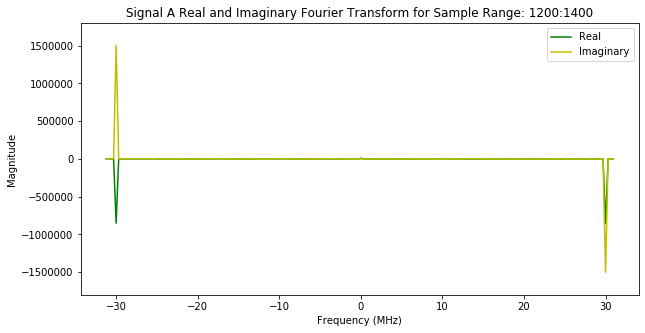

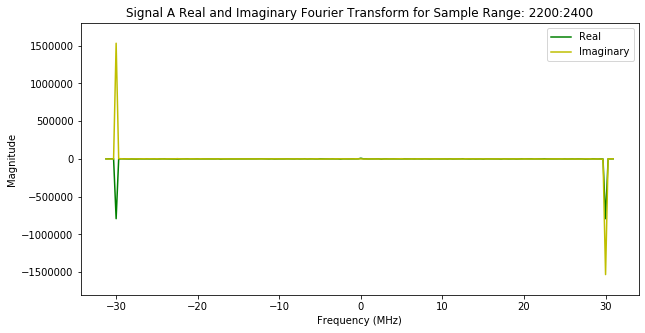

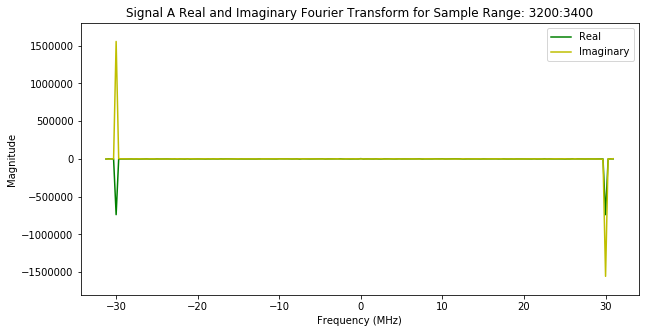

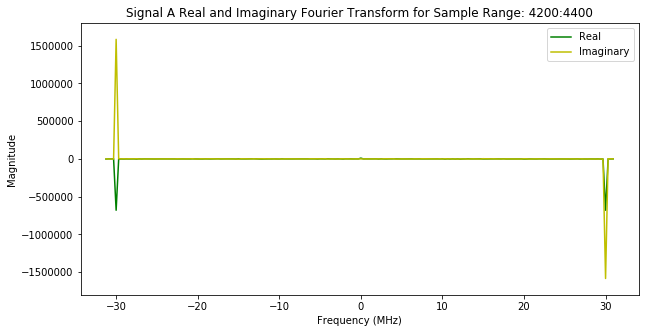

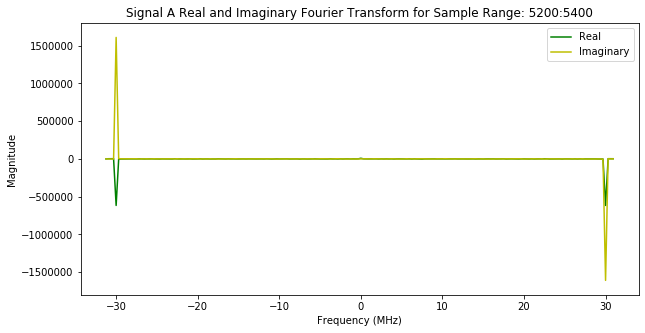

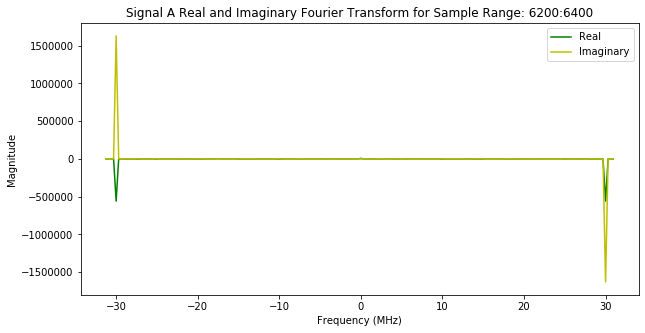

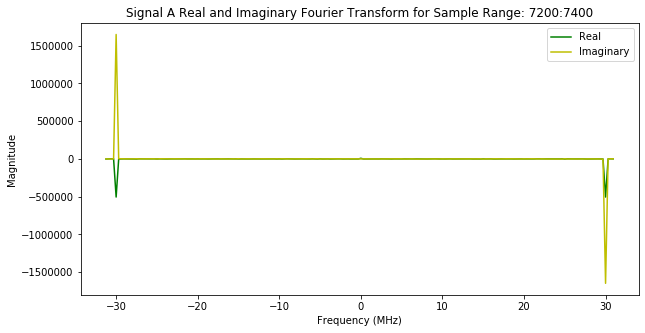

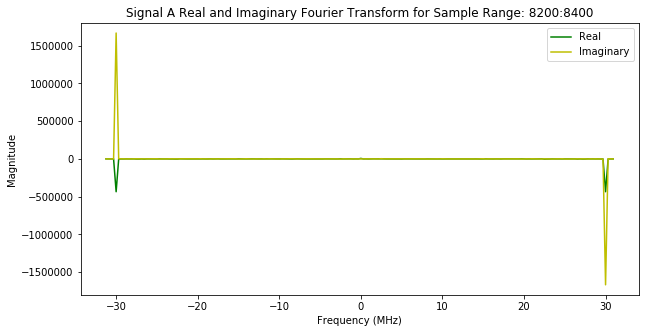

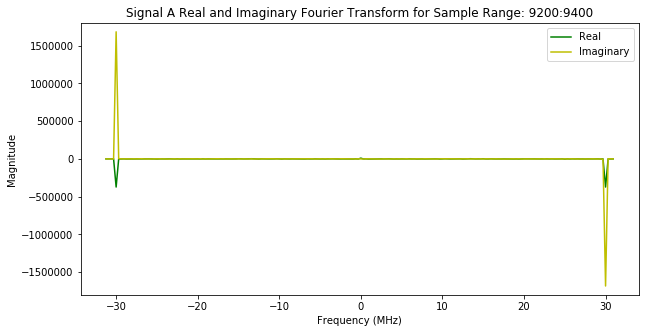

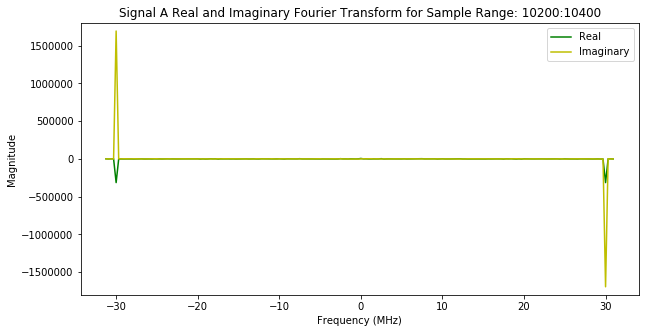

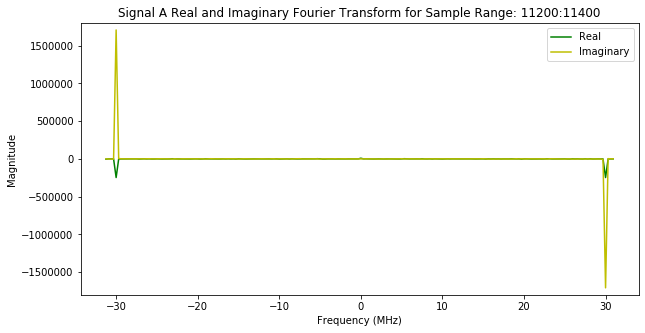

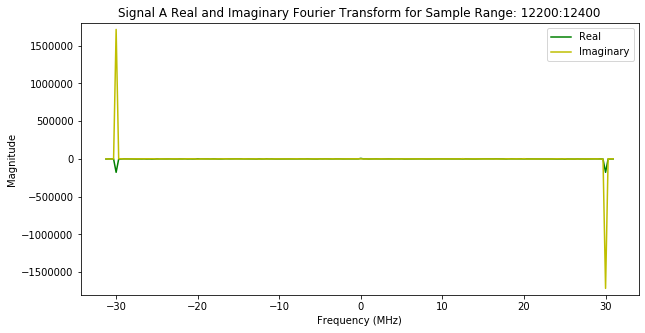

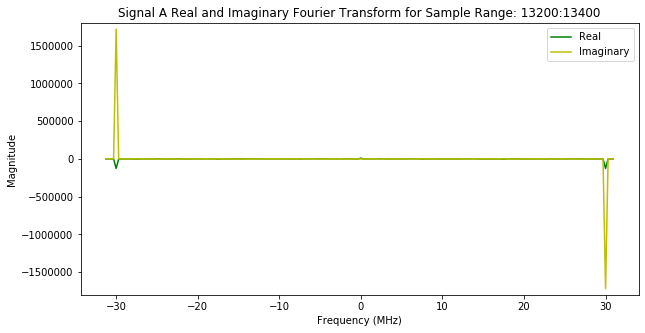

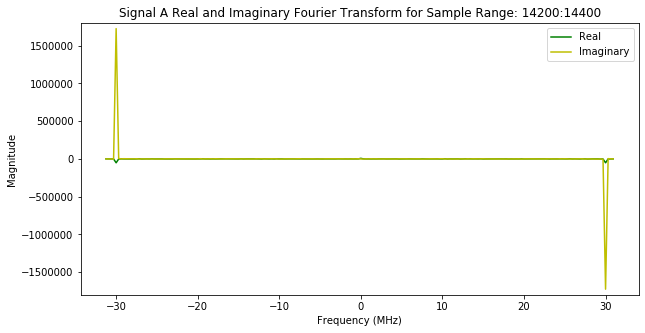

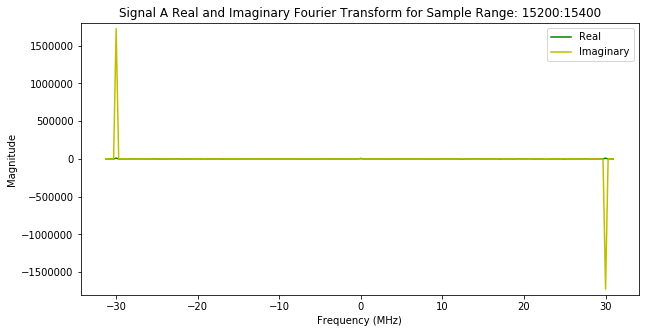

In [35]:
for i in range(200, 16000, 1000):
    sig_a_data_2 = imported_data["arr_0"][0,0, i:i+200]
    dft_sig_a_2 = dft.dft(sig_a_data_2, vsamp=62500000)[1]
    plt.figure(figsize=(10,5))
    #plt.xlim(-30, 30)
    plt.ylim(-1800000, 1800000)
    plt.plot(ft_time1, dft_sig_a_2.real, 'g')
    plt.plot(ft_time1, dft_sig_a_2.imag, 'y')
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Magnitude")
    plt.legend(["Real", "Imaginary"])
    plt.title("Signal A Real and Imaginary Fourier Transform for Sample Range: " + str(i)+ ":"+str(i+200))

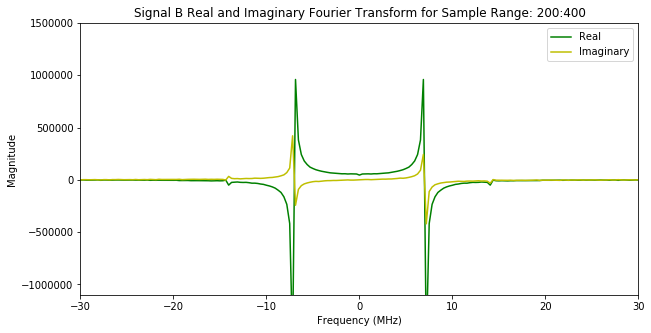

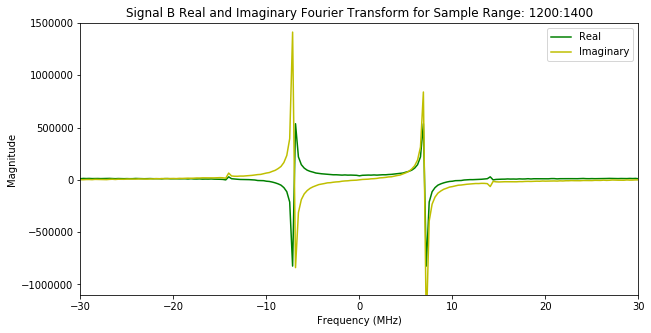

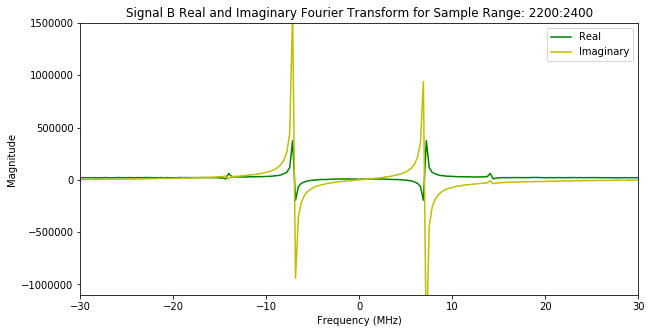

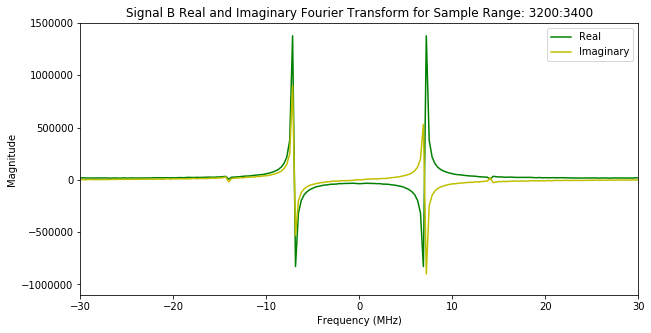

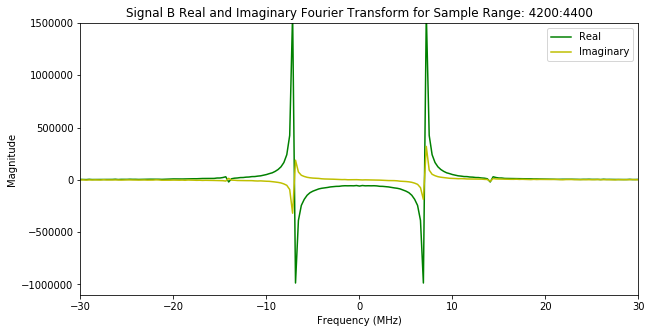

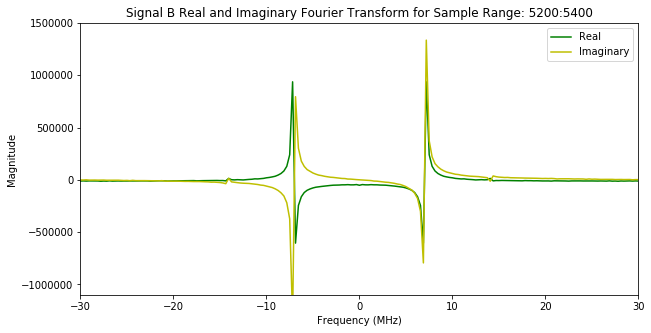

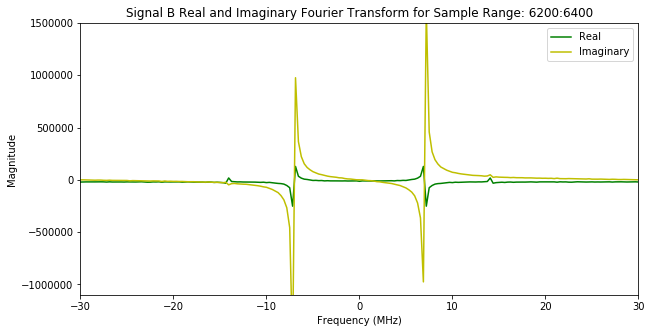

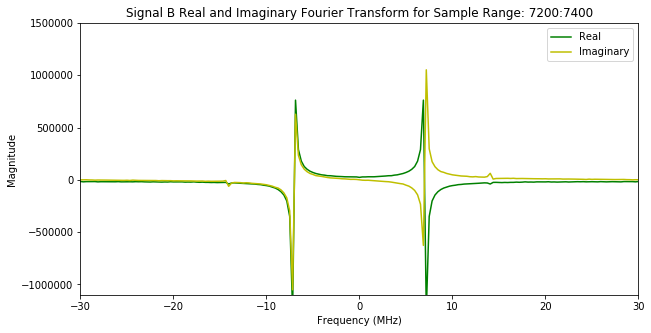

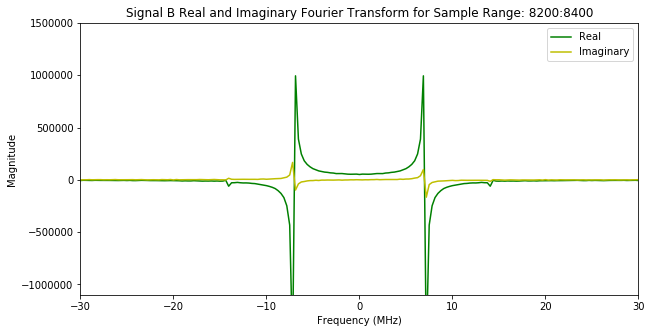

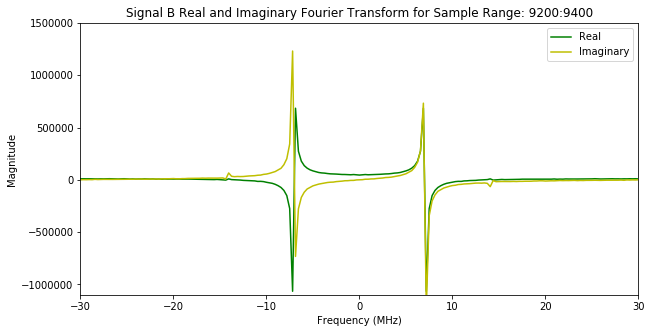

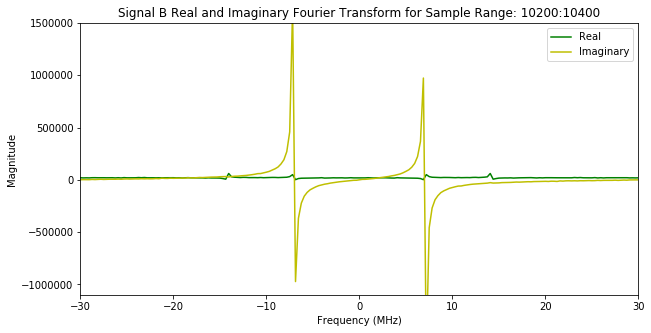

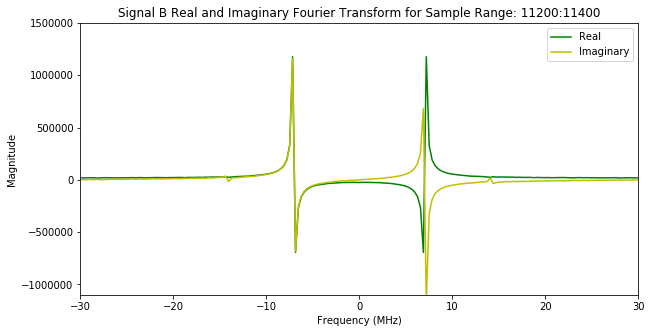

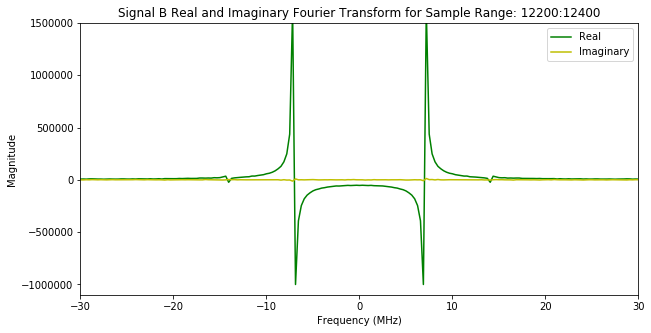

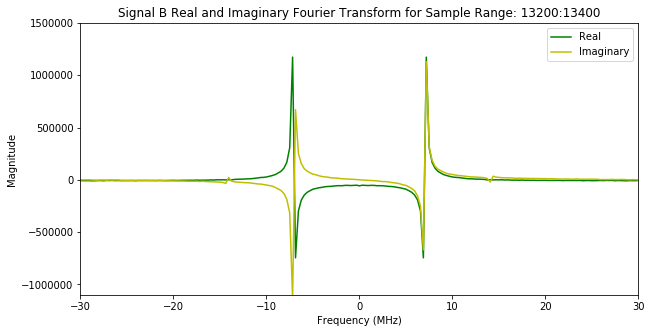

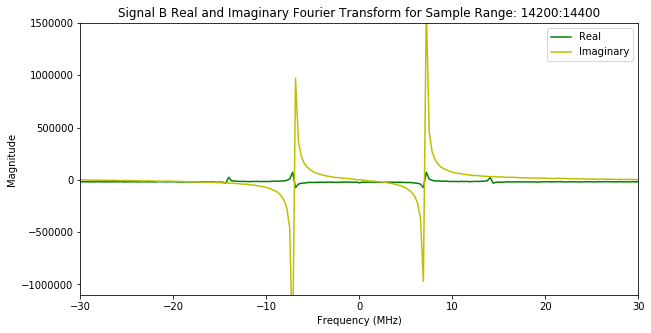

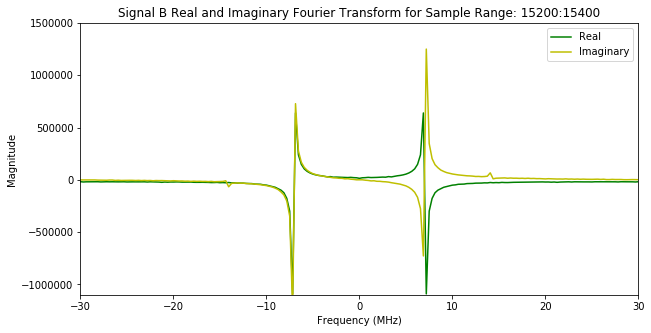

In [36]:
for i in range(200, 16000, 1000):
    sig_b_data_2 = imported_data["arr_0"][1,0, i:i+200]
    dft_sig_b_2 = dft.dft(sig_b_data_2, vsamp=62500000)[1]
    plt.figure(figsize=(10,5))
    plt.xlim(-30, 30)
    plt.ylim(-1100000, 1500000)
    plt.plot(ft_time1, dft_sig_b_2.real, 'g')
    plt.plot(ft_time1, dft_sig_b_2.imag, 'y')
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Magnitude")
    plt.legend(["Real", "Imaginary"])
    plt.title("Signal B Real and Imaginary Fourier Transform for Sample Range: " + str(i)+ ":"+str(i+200))